# Who Gains the Highest Salary? A Salary Analysis of Data Analysts

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

Salary is a fundamental part of people’s income and influences employees’ living quality. In general, salary is part of the investment of the company, indicating the value of the employees and the importance of their work. In the data analysis field, employees’ value can be elevated along with their accumulating experience in technical skill sets, which is normally positively correlated with salary level. Nevertheless, industrial experience is not the only determinant deciding one’s salary level. For example, “employees with Data Analyst in their job title in San Francisco, California earn an average of 32.4% more than the national average.'' Therefore, there are more explanatory factors affecting employees’ salary levels. Our object is to find out potential determinants for salary levels utilizing exploratory data analysis.
In this report, we employed and focused on five potential explanatory factors, which are sector, location, job title, company’s revenue, public rating, to analyze the dynamic salary level, indicating how companies value and invest in their employees. To analyze the influence for each potential factor, we employed multivariate analysis to determine the influence from each factor. In conclusion, we found that sector, location, and job title would influence employees’ salary levels; whereas, the company’s revenue and public rating have little impact on salary level. Specifically, data analysts are mostly working in the sector of finance, information technology, and business services, and in those sectors, analysts working in California, with the title of a senior data analyst, would gain the highest level of salary. In particular, the factor of location influences data analysts’ salaries the most compared to the other factors selected.

# Names

- Linda Lin
- Pu Tan
- Zefang Yuan
- Zixun Zhang


<a id='research_question'></a>
# Research Question

In the field of Data Analyst, what factors influence the salary: job title, location, sector, rating, or company revenue? Which one of the factors listed is the most influential？

<a id='background'></a>

## Background & Prior Work

In the contemporary world, the data analyst job is one of the most heated jobs since it is needed by the majority of the industries, and it is featured with a relatively high salary. Even if the majority of the data analyst candidates may choose industries based on their interests or personal pursues, the salary is also a significant factor to consider. In this project, we will explore the factors that may influence data analyst salary.
 
One of the key potential factors to affect salary is the location of the job. Even if the job title and content are similar, the salary offered may vary due to the difference in location. As the reference 1 suggests, New York, New Hampshire, and Wyoming are the three states with the highest data analyst title (ref1). However, we are somehow curious about this result since the website does not provide the source of the data. Hence we find a Kaggle database in which job information from Glassdoor is recorded. In this project, we will group the jobs by location and examine whether they are have the same salary level with multiple means; at the end we will derive a conclusion on that.
 
The database contains more information than we expected. We may also assume that the company with higher revenue may pay a higher salary, which is rational since the company with high revenue may have more to pay their employees. Moreover, the salary level also depends on the particular industry the company is in. Companies located in the industry with high profit rates may be able to provide higher salary As the second reference indicates, the three industries that provide the highest salary are Entertainment, Hardware and Networking, and Finance (ref2). In this project, we may also examine the preciseness of this statements by exploring our data with quantitative analysis.

1)https://www.ziprecruiter.com/Salaries/What-Is-the-Average-Data-Analyst-Salary-by-State

2)https://careerfoundry.com/en/blog/data-analytics/data-analyst-salaries-by-industry/

# Hypothesis


We hypothesize that the salary level is positively correlated with the company revenue and rating, categorical data such as location, sector, and job title. We may explore some particular locations or sectors of which the data analyst jobs are featured with higher salary. We propose these hypotheses since we think companies with higher revenue are able to pay higher salaries; companies with higher rates may provide higher salary; companies varied by region may also have different salaries due to distinctive minimum wage and price level; companies varied by sectors may provide various salary due to different profitability of particular sector; job titles may also affect since one with junior or senior may indicates the difference in salary.

# Dataset(s)


(Copy this information for each dataset)
- Dataset Name: DataAnalyst
- Link to the dataset: https://www.kaggle.com/andrewmvd/data-analyst-jobs/download
- Number of observations: 2253

The dataset we will import contains 2253 job listings for data analyst positions scraped from glassdoor, with features we needed. We will focus on the job title, salary estimate, rating, location, sector, and revenue. There are some missing values in each column that were recorded as -1 or unknown, and we might choose to delete the corresponding observations. As we have enough number of observations, the dataset is still explortable after cleaning. 


# Setup

In [1]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

df=pd.read_csv('DataAnalyst.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


# Data Cleaning

First, we select the columns that we will use from the entire dataset. We notice that there are some values such as -1 and “Unknown”, that are representing the missing value. Thus, we defined a function to replace all the -1 and “Unknown” in the dataset to np.nan as standardize_data. In this case, we could drop these missing values later.

In [2]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
df_foruse=df[['Job Title','Rating','Salary Estimate','Location','Sector','Revenue']]

def standardize_data(str_in):
    if type(str_in)  is str:
        if 'Unknown' in str_in or str_in=='-1':
            output = np.nan
        else :
            output = str_in
    elif str_in==-1.0 :
            output = np.nan
    else:
            output = str_in
    return output
df_foruse.head()

,Job Title,Rating,Salary Estimate,Location,Sector,Revenue
0,"Data Analyst, Center on Immigration and Justic...",3.2,$37K-$66K (Glassdoor est.),"New York, NY",Non-Profit,$100 to $500 million (USD)
1,Quality Data Analyst,3.8,$37K-$66K (Glassdoor est.),"New York, NY",Health Care,$2 to $5 billion (USD)
2,"Senior Data Analyst, Insights & Analytics Team...",3.4,$37K-$66K (Glassdoor est.),"New York, NY",Information Technology,Unknown / Non-Applicable
3,Data Analyst,4.1,$37K-$66K (Glassdoor est.),"New York, NY",Information Technology,$50 to $100 million (USD)
4,Reporting Data Analyst,3.9,$37K-$66K (Glassdoor est.),"New York, NY","Arts, Entertainment & Recreation",$100 to $500 million (USD)


After finishing the function 'standardize_data', we want to apply the function to each entry of the data frame. Thus, we use a for loop to iterate every column of the data frame and apply the 'standardize_data' function. Finally, we reset the index of the frame.

In [3]:
df_foruse1 = pd.DataFrame()
for column in df_foruse:
    df_foruse1[column]=df_foruse[column].apply(standardize_data)
df_foruse1=df_foruse1.dropna(axis='rows').reset_index()
df_foruse1=df_foruse1.drop(columns=['index'])
df_foruse1.head()

,Job Title,Rating,Salary Estimate,Location,Sector,Revenue
0,"Data Analyst, Center on Immigration and Justic...",3.2,$37K-$66K (Glassdoor est.),"New York, NY",Non-Profit,$100 to $500 million (USD)
1,Quality Data Analyst,3.8,$37K-$66K (Glassdoor est.),"New York, NY",Health Care,$2 to $5 billion (USD)
2,Data Analyst,4.1,$37K-$66K (Glassdoor est.),"New York, NY",Information Technology,$50 to $100 million (USD)
3,Reporting Data Analyst,3.9,$37K-$66K (Glassdoor est.),"New York, NY","Arts, Entertainment & Recreation",$100 to $500 million (USD)
4,Data Science Analyst,3.7,$37K-$66K (Glassdoor est.),"New York, NY",Insurance,$100 to $500 million (USD)


Salary estimate is in the type of String, and it gives a range of salary for us. We want to use it as a numerical variable. Thus, we decide to use the mean of the upper and lower bound of the salary to represent the interval. We write a function 'standardized_salary' which standardizes the input string, and calculates the mean of the two numerical value in the string. Finally we apply the function to data frame's salary estimate column.

In [4]:
df_foruse1['Salary Estimate'].value_counts()
def standardized_salary(str_in):
    output=str_in.replace('K','')
    output=output.replace('-',' ')
    output=output.replace('$',' ')
    output=output.split()[0:2]
    int1 = int(output[0])
    int2 = int(output[1])
    output = (int1+int2)/2
    return output
df_foruse1['Salary Estimate'] = df_foruse1['Salary Estimate'].apply(standardized_salary)
df_foruse1.head()

,Job Title,Rating,Salary Estimate,Location,Sector,Revenue
0,"Data Analyst, Center on Immigration and Justic...",3.2,51.5,"New York, NY",Non-Profit,$100 to $500 million (USD)
1,Quality Data Analyst,3.8,51.5,"New York, NY",Health Care,$2 to $5 billion (USD)
2,Data Analyst,4.1,51.5,"New York, NY",Information Technology,$50 to $100 million (USD)
3,Reporting Data Analyst,3.9,51.5,"New York, NY","Arts, Entertainment & Recreation",$100 to $500 million (USD)
4,Data Science Analyst,3.7,51.5,"New York, NY",Insurance,$100 to $500 million (USD)


In [5]:
df_foruse1['Revenue'].value_counts()

$100 to $500 million (USD)          216
$50 to $100 million (USD)           197
$10+ billion (USD)                  187
$2 to $5 billion (USD)              129
$10 to $25 million (USD)            125
$25 to $50 million (USD)            106
$1 to $5 million (USD)               91
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
Less than $1 million (USD)           74
$5 to $10 million (USD)              66
$5 to $10 billion (USD)              56
Name: Revenue, dtype: int64

In this section, we recategorized the revenue column by merging the neighborhood revenue ranges and transformed it into four categories: "1 million to 10 million dollar", " 10 million to 100 million dollar", "100 million to 1b dollar", and "over 1b dollar" respectively.

In [6]:
def recategorize(str_in):
    if str_in=='Less than $1 million (USD)' or str_in=='$1 to $5 million (USD)' or str_in=='$5 to $10 million (USD)':
        output = 'under 10m dollars'
    elif str_in=='$10 to $25 million (USD)' or str_in=='$25 to $50 million (USD)' or str_in=='$50 to $100 million (USD)':
        output = '10m-100m dollar'
    elif str_in=='$100 to $500 million (USD)' or str_in=='$500 million to $1 billion (USD)':
        output = '100m-1b dollar'
    else:
        output = 'over 1b dollar'
    return output
df_foruse1['Revenue'] = df_foruse1['Revenue'].apply(recategorize)
df_foruse1.head()

,Job Title,Rating,Salary Estimate,Location,Sector,Revenue
0,"Data Analyst, Center on Immigration and Justic...",3.2,51.5,"New York, NY",Non-Profit,100m-1b dollar
1,Quality Data Analyst,3.8,51.5,"New York, NY",Health Care,over 1b dollar
2,Data Analyst,4.1,51.5,"New York, NY",Information Technology,10m-100m dollar
3,Reporting Data Analyst,3.9,51.5,"New York, NY","Arts, Entertainment & Recreation",100m-1b dollar
4,Data Science Analyst,3.7,51.5,"New York, NY",Insurance,100m-1b dollar


The location contained in this dataframe is specified in form of city,state. We need to standardize the location information in order to decrease the number of location categories. Hence we may only keep the state information. The following function standardize_location keeps the last two characters, which is the state of location.

In [7]:
def standardize_location(str_in):
    output=str_in[-2:]
    return output
df_foruse1['Location'] = df_foruse1['Location'].apply(standardize_location)
df1=df_foruse1
df1.head()

,Job Title,Rating,Salary Estimate,Location,Sector,Revenue
0,"Data Analyst, Center on Immigration and Justic...",3.2,51.5,NY,Non-Profit,100m-1b dollar
1,Quality Data Analyst,3.8,51.5,NY,Health Care,over 1b dollar
2,Data Analyst,4.1,51.5,NY,Information Technology,10m-100m dollar
3,Reporting Data Analyst,3.9,51.5,NY,"Arts, Entertainment & Recreation",100m-1b dollar
4,Data Science Analyst,3.7,51.5,NY,Insurance,100m-1b dollar


We are interested in whether the job title create any difference in salary estimate. Realizing that the job titles are not standardized, we will standarize the job title by dividing them into junior data analyst, data analyst, and senior data analyst. The following function standardize the job title by checking if it contains the keyword we are looking for.

In [8]:
def standardize_job(str_in):
    str_in=str_in.lower()
    if 'senior' in str_in:
        output='senior data analyst'
    elif 'junior' in str_in:
        output='junior data analyst'
    else:
        output='data analyst'
    return output
df1['Job Title'] = df_foruse1['Job Title'].apply(standardize_job)
df1.head()
df_foruse1['Job Title'].value_counts()

data analyst           1199
senior data analyst     165
junior data analyst      49
Name: Job Title, dtype: int64

# Data Analysis & Results

All hypothesis test conduct in the following deploys a significance level α=0.05

### Job Title

We think that different levels of data analysts may lead to a huge gap in the salary. For instance, a senior data analyst will make much more money than an entry level data analyst. Thus, we want to investigate how the level of data analysts will affect the salary. First, we want to take a look at the number for each level of data analysts in this data set, to make sure that we have enough data for each level.

In [9]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
df_foruse1['Job Title'].value_counts()

data analyst           1199
senior data analyst     165
junior data analyst      49
Name: Job Title, dtype: int64

We draw three histograms for ‘senior data analyst’, ‘junior data analyst’, and ‘data analyst’, with the horizontal axis representing the salary in thousands of dollars and the vertical axis representing the proportion of the corresponding salary in each level. From these three histograms we can see that the highest proportion of senior data analysts is 70K dollars, which is higher than the salary corresponding to the highest proportion of the other two levels.

Text(0.5, 0, 'senior data analyst')

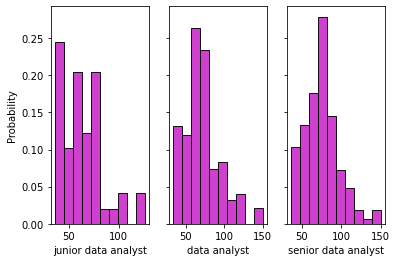

In [10]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=True)

sns.histplot(df1.loc[df1['Job Title'] == 'junior data analyst']['Salary Estimate'],ax=ax1,stat='probability',bins=10,color='m')
ax1.set_xlabel('junior data analyst')

sns.histplot(df1.loc[df1['Job Title'] == 'data analyst']['Salary Estimate'],stat='probability',bins=10,ax=ax2,color='m')
ax2.set_xlabel('data analyst')

sns.histplot(df1.loc[df1['Job Title'] == 'senior data analyst']['Salary Estimate'],stat='probability',bins=10,ax=ax3,color='m')
ax3.set_xlabel('senior data analyst')

To better compare the salary of the three levels of data analysts, we computed the average salary for these three levels. We can see that senior data analysts have the highest average salary and junior data analysts have the lowest average salary.

In [11]:
avg=df1.loc[df1['Job Title'] == 'data analyst']['Salary Estimate'].mean()
avg_jr=df1.loc[df1['Job Title'] == 'junior data analyst']['Salary Estimate'].mean()
avg_sr=df1.loc[df1['Job Title'] == 'senior data analyst']['Salary Estimate'].mean()
print('data analyst mean salary level is ',avg)
print('junior data analyst mean salary level is ',avg_jr)
print('senior data analyst mean salary level is ',avg_sr)

data analyst mean salary level is  71.15512927439534
junior data analyst mean salary level is  63.224489795918366
senior data analyst mean salary level is  75.68484848484849


Then we conduct hypothesis tests to compare the true mean salary estimate among junior data analyst, data analyst, and senior data analyst. If we set μ1, μ2, μ3 as the true mean salary level for each category.

In [12]:
sr=df1.loc[df1['Job Title'] == 'senior data analyst']['Salary Estimate']
jr=df1.loc[df1['Job Title'] == 'junior data analyst']['Salary Estimate']
data_analyst=df1.loc[df1['Job Title'] == 'data analyst']['Salary Estimate']

First we conduct a test on junior data analysts against data analysts. Taking the null hypothesis is μ1=μ2, and the alternative hypothesis is μ1<μ2. The p-value is 0.01 which is smaller than α, then we reject the null and accept the alternative hypothesis. Junior data analysts do have lower salary estimates than data analysts.

In [13]:
stats.ttest_ind(data_analyst,sr,alternative='less')
t_val=stats.ttest_ind(data_analyst,sr,alternative='less')[0]
p_val=stats.ttest_ind(data_analyst,sr,alternative='less')[1]
p_val

0.010111844171525932

Then we conduct a test on data analysts against senior data analysts. Taking the null hypothesis is μ2=μ3, and the alternative hypothesis is μ2<μ3. The p-value is 0.01 which is smaller than α, then we reject the null and accept the alternative hypothesis. Data analysts do have lower salary estimates than senior data analysts.

In [14]:
stats.ttest_ind(jr,data_analyst,alternative='less')
t_val=stats.ttest_ind(jr,data_analyst,alternative='less')[0]
p_val=stats.ttest_ind(jr,data_analyst,alternative='less')[1]
p_val

0.010233992989044429

### Location

In order to secure the appropriate location to analyze, we need to pick the locations which have enough sample size. We draw a bar plot to show the sample sizes of each location. 

We can observe that locations “NY”, “CA”, “TX” have enough sample size for our analysis.

<AxesSubplot:xlabel='count', ylabel='Location'>

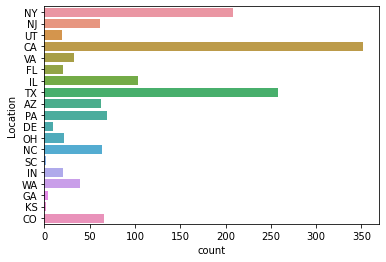

In [15]:
#location
sns.countplot(y='Location',data=df1)

Next, we want to visualize the salary distribution of each location. We use histograms with probability arguments to make the sum of the height of bins in each graph the same, since each location has a different sample size.

Text(0.5, 0, 'TX')

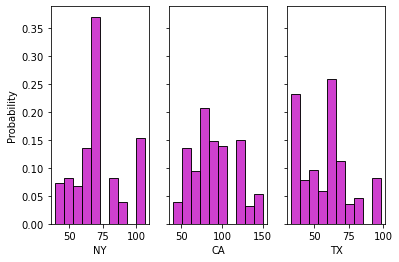

In [16]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=True)

sns.histplot(df1.loc[df1['Location'] == 'NY']['Salary Estimate'],ax=ax1,stat='probability',bins=10,color='m')
ax1.set_xlabel('NY')

sns.histplot(df1.loc[df1['Location'] == 'CA']['Salary Estimate'],ax=ax2,stat='probability',bins=10,color='m')
ax2.set_xlabel('CA')

sns.histplot(df1.loc[df1['Location'] == 'TX']['Salary Estimate'],ax=ax3,stat='probability',bins=10,color='m')
ax3.set_xlabel('TX')

We can see there may be a difference in salary among three locations. To make sure that there is a difference of salary distribution among these locations, we calculate their mean salary.

In [17]:
avg_ny=df1.loc[df1['Location'] == 'NY']['Salary Estimate'].mean()
avg_ca=df1.loc[df1['Location'] == 'CA']['Salary Estimate'].mean()
avg_tx=df1.loc[df1['Location'] == 'TX']['Salary Estimate'].mean()
print('NY mean salary level is ',avg_ny)
print('CA mean salary level is ',avg_ca)
print('TX mean salary level is ',avg_tx)

NY mean salary level is  70.96875
CA mean salary level is  89.83522727272727
TX mean salary level is  58.45348837209303


From the mean salary, we can arrange these three locations by their salary distribution for the following T-test with the null hypothesis: There is no difference between the salary estimate of “location1” and “location2”, and alternative hypothesis: the salary estimate of “location1” is less than the salary estimate of “location2”.

We will build 2 T-tests to check if there is a difference of salary distribution in these three locations. First, we compare the salary distribution of Texas and NewYork. The result of the T-test shows that we reject the null hypothesis, the salary estimate of Texas is less than the salary estimate of NewYork.

Finally, we build a T-test to check if the salary estimate of NewYork is different from the salary estimate of California. We get an extremely small p-value, and reject the null hypothesis. The salary estimate of NewYork is less than the salary estimate of California.

In [18]:
tx_salary=df1.loc[df1['Location'] == 'TX']['Salary Estimate']
ny_salary=df1.loc[df1['Location'] == 'NY']['Salary Estimate']
ca_salary=df1.loc[df1['Location'] == 'CA']['Salary Estimate']

In [19]:
stats.ttest_ind(tx_salary,ny_salary,alternative='less')
t_val=stats.ttest_ind(tx_salary,ny_salary,alternative='less')[0]
p_val=stats.ttest_ind(tx_salary,ny_salary,alternative='less')[1]
t_val

-7.399239394486738

In [20]:
print(p_val)

3.23797261976316e-13


In [21]:
stats.ttest_ind(ny_salary,ca_salary,alternative='less')
t_val=stats.ttest_ind(ny_salary,ca_salary,alternative='less')[0]
p_val=stats.ttest_ind(ny_salary,ca_salary,alternative='less')[1]
t_val

-8.715840614872292

In [22]:
print(p_val)

1.6487721793186103e-17


### Sector

Firstly, we utilized the countplot to see the general information for the sector in our dataset. As shown, Information Technology(IT), Business Services(BS), and Finance(F) hire more data analysts than the other sectors do. Thus, we decided to employ these three sectors to generate the following analysis. 


<AxesSubplot:xlabel='count', ylabel='Sector'>

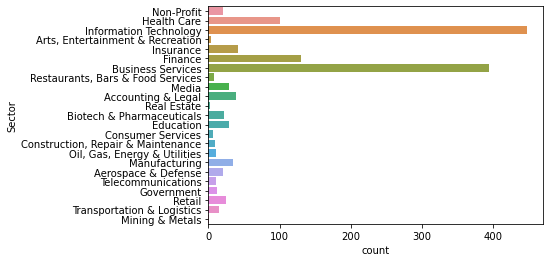

In [23]:
sns.countplot(y='Sector',data=df1)

Secondly, as the data is numeric, we utilized a histogram to visualize the distribution for each sector. In general, the data for all three sectors concentrated between 50m to 100m with some data slightly skewed to the right. In other words, most of the data analyst’s salaries range from 50m to 100m. More specifically, for analysts in the sector of Finance and Information Technology, about 50 percent of them get the salary ranging from 60m to 70m; for analysts in the Business Service sector, about 30 percent of analysts get paid at around 60m. Notably, data analysts’ salary level is more concentrated in the Business Service sector than the other two sectors.

Text(0.5, 0, 'Business Services')

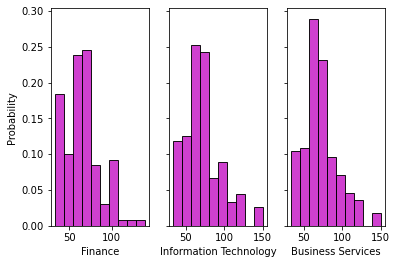

In [24]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=True)

sns.histplot(df1.loc[df1['Sector'] == 'Finance']['Salary Estimate'],stat='probability',bins=10,ax=ax1,color='m')
ax1.set_xlabel('Finance')

sns.histplot(df1.loc[df1['Sector'] == 'Information Technology']['Salary Estimate'],stat='probability',bins=10,ax=ax2,color='m')
ax2.set_xlabel('Information Technology')

sns.histplot(df1.loc[df1['Sector'] == 'Business Services']['Salary Estimate'],stat='probability',bins=10,ax=ax3,color='m')
ax3.set_xlabel('Business Services')

Then, we calculated the average salary is 66m, 72.44m, and 72.19m for the sectors of Finance, IT, and BS, respectively. On average, Data analysts get lower wages in Finance than the other two sectors.

In [25]:
avg_F=df1.loc[df1['Sector'] == 'Finance']['Salary Estimate'].mean()
avg_IT=df1.loc[df1['Sector'] == 'Information Technology']['Salary Estimate'].mean()
avg_BS=df1.loc[df1['Sector'] == 'Business Services']['Salary Estimate'].mean()
print('F mean salary level is ',avg_F)
print('IT mean salary level is ',avg_IT)
print('BS mean salary level is ',avg_BS)

F mean salary level is  66.0
IT mean salary level is  72.44642857142857
BS mean salary level is  72.19543147208122


In [26]:
F_salary=df1.loc[df1['Sector'] == 'Finance']['Salary Estimate']
IT_salary=df1.loc[df1['Sector'] == 'Information Technology']['Salary Estimate']
BS_salary=df1.loc[df1['Sector'] == 'Business Services']['Salary Estimate']

We performed a t-test to examine whether the salary difference between the sector of Finance and IT is significant. The p-value of 0.00296, which is less than 0.05, indicates that we can reject the null hypothesis of identical salary, meaning that the salary difference is indeed significant enough between the sectors of Finance and IT.

In [27]:
stats.ttest_ind(F_salary,IT_salary,alternative='less')
t_val=stats.ttest_ind(F_salary,IT_salary,alternative='less')[0]
p_val=stats.ttest_ind(F_salary,IT_salary,alternative='less')[1]
print(p_val)

0.0029663356184525536


We performed a t-test to examine whether the salary difference between the sector of Finance and BS is significant. The p-value of 0.0029, which is less than 0.05, indicates that we can reject the null hypothesis of identical salary, meaning that the salary difference is indeed significant enough between the sectors of Finance and BS.

In [28]:
stats.ttest_ind(F_salary,BS_salary,alternative='less')
t_val=stats.ttest_ind(F_salary,BS_salary,alternative='less')[0]
p_val=stats.ttest_ind(F_salary,BS_salary,alternative='less')[1]
print(p_val)

0.002908527461516048


We performed a t-test to examine whether the salary difference between the sector of Finance and BS is significant. The p-value of 0.5615, which is greater than 0.05, indicates that we fail to reject the null hypothesis of identical salary, meaning that the salary between the sectors of Finance and BS might not be that different.

In [29]:
stats.ttest_ind(IT_salary,BS_salary,alternative='less')
t_val=stats.ttest_ind(IT_salary,BS_salary,alternative='less')[0]
p_val=stats.ttest_ind(IT_salary,BS_salary,alternative='less')[1]
print(p_val)

0.5615389632268661


### Revenue

First we draw a count plot that counts the frequency of data within each category (under10m dollar, 10m-100m dollar, 100m-1b dollar, over 1b dollar). From the plot that follows, it is quite obvious that the count of each sort is reasonably high, hence we may include all data into further analysis. 


<AxesSubplot:xlabel='count', ylabel='Revenue'>

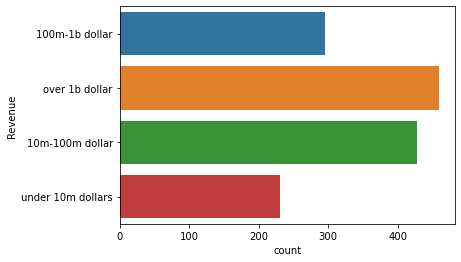

In [30]:
sns.countplot(y='Revenue',data=df1)

Then we may draw histograms to see the proportion of each salary interval under each specific category of revenue. We use proportion here instead of counts because the total counts of data under each category are unequal. From the histogram below, the differences among the distributions are not obvious. We may conduct further quantitative analysis.

Text(0.5, 0, 'over 1b')

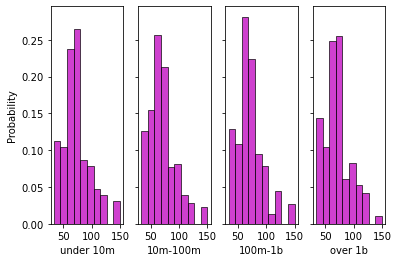

In [40]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,sharey=True)

sns.histplot(df1.loc[df1['Revenue'] == 'under 10m dollars']['Salary Estimate'],stat='probability',bins=10,ax=ax1,color='m')
ax1.set_xlabel('under 10m')

sns.histplot(df1.loc[df1['Revenue'] == '10m-100m dollar']['Salary Estimate'],stat='probability',bins=10,ax=ax2,color='m')
ax2.set_xlabel('10m-100m')

sns.histplot(df1.loc[df1['Revenue'] == '100m-1b dollar']['Salary Estimate'],stat='probability',bins=10,ax=ax3,color='m')
ax3.set_xlabel('100m-1b')
sns.histplot(df1.loc[df1['Revenue'] == 'over 1b dollar']['Salary Estimate'],stat='probability',bins=10,ax=ax4,color='m')
ax4.set_xlabel('over 1b')

The following cell prints out the mean salary level for each revenue category. We find that there is no large difference among these four categories. Hence we may conduct hypothesis tests on the data.

In [32]:
avg_100_1b=df1.loc[df1['Revenue'] == '100m-1b dollar']['Salary Estimate'].mean()
avg_over1b=df1.loc[df1['Revenue'] == 'over 1b dollar']['Salary Estimate'].mean()
avg_10_100=df1.loc[df1['Revenue'] == '10m-100m dollar']['Salary Estimate'].mean()
avg_under10m=df1.loc[df1['Revenue'] == 'under 10m dollars']['Salary Estimate'].mean()
print('100m-1b mean salary level is ',avg_100_1b)
print('1b+ mean salary level is ',avg_over1b)
print('10m-100m mean salary level is ',avg_10_100)
print('10m- mean salary level is ',avg_under10m)

100m-1b mean salary level is  71.41016949152542
1b+ mean salary level is  71.17320261437908
10m-100m mean salary level is  70.53621495327103
10m- mean salary level is  73.49350649350649


In the cell that follows, we store the salary level of each category into a list. We will test if there are differences among the categories if we select two for comparison. If we set μ1, μ2, μ3, μ4 as the true mean salary level for each category. The null hypothesis is μi=μj, and the alternative hypothesis is μi<μj, if i ≠ j. The following for loop ensures that we makes comparison for each possible combination of two categories. The p-values printed indicates that there are no differences in salary level if we divide the data according to company revenue.

In [33]:
revenue_100_1b=df1.loc[df1['Revenue'] == '100m-1b dollar']['Salary Estimate']
revenue_over1b=df1.loc[df1['Revenue'] == 'over 1b dollar']['Salary Estimate']
revenue_10_100=df1.loc[df1['Revenue'] == '10m-100m dollar']['Salary Estimate']
revenue_under10m=df1.loc[df1['Revenue'] == '10m-100m dollar']['Salary Estimate']
revenueLst = [revenue_under10m,revenue_10_100,revenue_100_1b, revenue_over1b]
ttest_result = []
for i in range(3):
    for j in range(i+1,4):
        ttest_result.append(stats.ttest_ind(revenueLst[i], revenueLst[j], alternative='less')[1])
        
ttest_result

[0.5,
 0.3125464789575185,
 0.3405809937070715,
 0.3125464789575185,
 0.3405809937070715,
 0.5540783549495134]

### Rating

Rating and salary are both considered to be quantitative variables, hence we may deploy scatter plot to see if there is a obvious pattern that shows correlation between these two variales. From the scatter plot shown below, there is no obvious pattern for the distribution of the points, and the line that fits is almost horizontal. We suspect that there is no correlation between rating and salary, and we will verify it by linear regression later.

/opt/conda/lib/python3.9/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


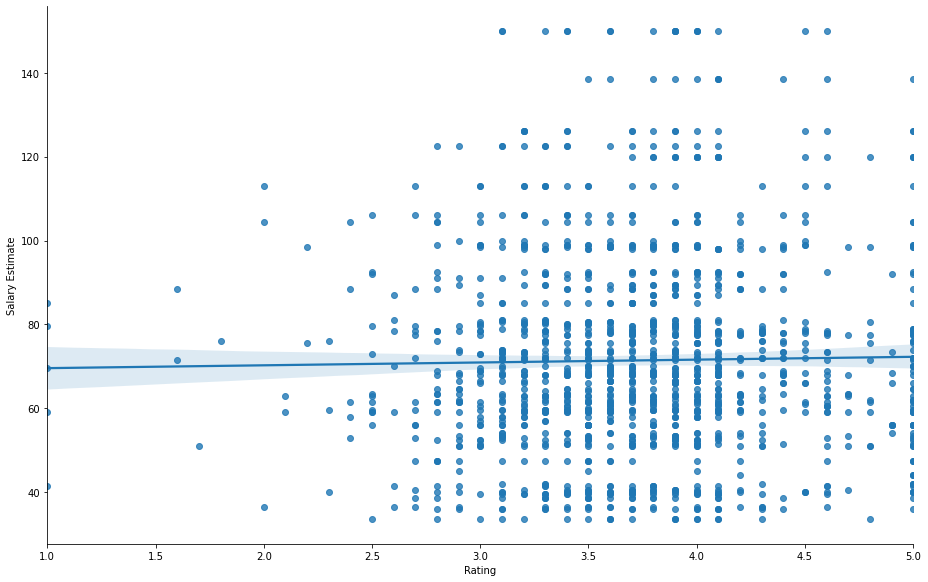

In [34]:
sns.lmplot(
    x='Rating',
    y='Salary Estimate',
    data=df1,
    fit_reg=True,
    aspect=1.6,
    size=8
)


We use linear regression to compute the correlation between companies’ rating and salary estimate. Our null hypothesis is that there is no correlation between companies’ ratings and salary estimates. Our alternative hypothesis is that there is a statistically significant correlation between companies’ rating and salary estimate.
Here we can see the result of our OLS model. We observe that the p-value is very large. We can not reject the null hypothesis. Based on our model and data, we conclude that there is no statistically significant correlation between companies’ ratings and salary estimate.


In [35]:
df_use=df1[['Salary Estimate','Rating']]
df_use.columns=['salary','rating']
outcome_1,predictors_1=patsy.dmatrices('salary~rating',df_use)

mod_1=sm.OLS(outcome_1,predictors_1)

res_1=mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4468
Date:                Thu, 09 Dec 2021   Prob (F-statistic):              0.504
Time:                        17:22:41   Log-Likelihood:                -6462.4
No. Observations:                1413   AIC:                         1.293e+04
Df Residuals:                    1411   BIC:                         1.294e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.8880      3.823     18.020      0.0

### Multiple Regression

In order to conduct multiple regression analysis, we may limit the values of predictors in a certain range. Here we want to evaluate which factor creates the largest effect on the salary estimate. Considering the representativeness of the sample, we may only select data with location in NY, CA, or TX and the sector of finance, information technology, or business services. The following cell creates a new dataframe containing the data.

In [36]:
df_test=df1.loc[(df1['Location']=='CA') | (df1['Location']=='NY') | (df1['Location']=='TX')]
df_test = df_test.loc[(df_test['Sector']=='Finance') | (df_test['Sector']=='Information Technology') | (df_test['Sector']=='Business Services')]
df_test.value_counts()
df_test.shape

(541, 6)

We may now conduct multiple regression on the dataframe we created above. From the summary printed below, we may assess the summary printed by comparing the p-values which determine whether the coefficient is 0. Here we find that the p-value of both T.NY and T.TX are 0.000, which indicates that we can conclude that the coefficient for the location variable is not 0, while other p-values are not sufficiently small to reject the null hypothesis of coefficient=0. Hence the location creates the most influence on the salary estimate compared to the other factors selected.

In [37]:
df_use1=df_test[['Salary Estimate','Rating','Sector','Job Title','Location','Revenue']]
df_use1.columns=['salary','rating','sector','title','location','revenue']
outcome_2,predictors_2=patsy.dmatrices('salary~rating+sector+title+location+revenue',df_use1)

mod_2=sm.OLS(outcome_2,predictors_2)

res_2=mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     21.49
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           1.03e-33
Time:                        17:22:41   Log-Likelihood:                -2448.3
No. Observations:                 541   AIC:                             4919.
Df Residuals:                     530   BIC:                             4966.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

# Ethics & Privacy

The data we utilize is from Kaggle, with title Data Analyst Jobs, which is public and open source. Thus, the credibility and privacy can be secured. The data set records 2253 observations of people’s salary estimate, location, company rating, size, and job title. This data set will help us to explore the possible relationship between Data Analyst’s salary and other factors in the data set. There is no personal information which would disclose any privacy information. We will take extra effort to check to make sure that any information that may be used to identify private information will be removed.

Since we don’t know how the creator of this data set collected the data, and the data set may be a little bit outdated, which is on Jul 14 2020, the data set may be biased. Besides, there may be more underlying factors which affect Data Analyst jobs’ salary, and we can not control these factors. Given these potential or inherent biases, our conclusion from our analysis should not be used to predict the salary of Data Analyst jobs.

The practice of Data Analytics has gradually evolved and broadened over time. The dataset we got does not indicate the specific time period of the job listings; thus, the salaries might differ by the enormous confounding variables, such as dynamic economic environment which affect inflation or deflation rates, changes in government policies, natural disasters or disease, such as Covid-19 pandemic. One solution we figure out is to find another dataset with features needed in one single year and perform the same analysis. Then, we would cross validating the result. Specifically, if the conclusion we gained from the original dataset is that location of company is the dominant influencing factor of the data analysts’ salaries, we could examine the result by checking the result from the second dataset which focuses on one single year. If the two datasets indicate the same results, then the conclusion is verdited; otherwise, there might be third factors influencing the salary and further analysis is needed. The dataset only includes the job listings in the United States, with which the conclusions we proposed are not applicable for other countries. Likewise, some data analyst job listings might not be posted online but through direct personal reference and the salaries are not transparent. Other confounding variables which determine the individual’s salaries, such as the size of the company, type of the company’s ownership, annual revenue of the company, are not considered in this project.

# Conclusion & Discussion

### Conclusion

In this project, our goal is trying to find a relationship between the job title, location, rating of the company, revenue, sector, and the salary of data analysts. We think one or more of these factors will determine the salary of data analysts, so we hypothesize that there will be a positive correlation between the salary level and these factors. Based on the result from our models, we found that job title, location, and sector will have some influence on the salary level, which have p values less than 0.05, but the revenue and rating of the company will not affect the salary of data analyst very much. Specifically, the location of the company has the greatest impact on the salary level. We utilized t-test and found that senior data analysts have higher salary than data analysts and junior analyst, and junior analysts have lower salary than data analysts. Also, through t-test, the result shows us that California has the highest salary for data analysts, and Texas has relatively low salary among CA, NY, TX three states. Moreover, the IT sector has the highest salary, but there is not much difference between the salary of the business services sector and finance sector. We employed a t-test on revenue and built an OLS model on ratings, the results show that these two factors are not influential to the salary level.

### Discussion

In data cleaning, it is very hard for us to clean the Job Title of the data. We decide to put them into three categories: data analyst, senior data analyst, and junior data analyst. After we finish cleaning the data, we plan to analyze the relation between salary and other factors in every category of job title. However, we find that the data’s sample size is not large enough to do analysis on each category. Junior data analyst only contains 49 samples. Given such a small sample size, the result of our analysis can not be persuasive. As a result, we have to give up our plan, and analyze job titles just as other factors. When we analyze the potential relationship between region and salary, the distribution of sample’s location is highly uneven. The number of samples that comes from one region can be much larger than the samples that come from another region. With the limited sample size, the number of samples coming from a specific region can be too low to do analysis. This limitation forces us to just pick four regions which have enough sample size. If the sample size is big enough, we believe that our result and conclusion can be more detailed and persuasive.


# Team Contributions

Linda Lin: Overview,data cleaning of job title, EDA on job title, EDA on rating.

Pu Tan: Background and Prior Work, data cleaning of sector, EDA on location, Ethics & Privacy.

Zefang Yuan: Datasets, data cleaning of revenue, EDA on Sector, Conclusion & discussion.

Zixun Zhang: Setup, EDA on revenue, data cleaning of location, Multiple regression of EDA.

The team works togeher on research questions and hypothesis and provide support on each others' parts